# Assignment 3

Implementation of Support Vector Machines (SVM) for classifying images of 
handwritten digits into their respective numerical classes (0 to 9).

In [1]:
! pip install scikit-learn matplotlib numpy

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target.astype(int)

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [9]:
from sklearn.metrics import accuracy_score
y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9210714285714285


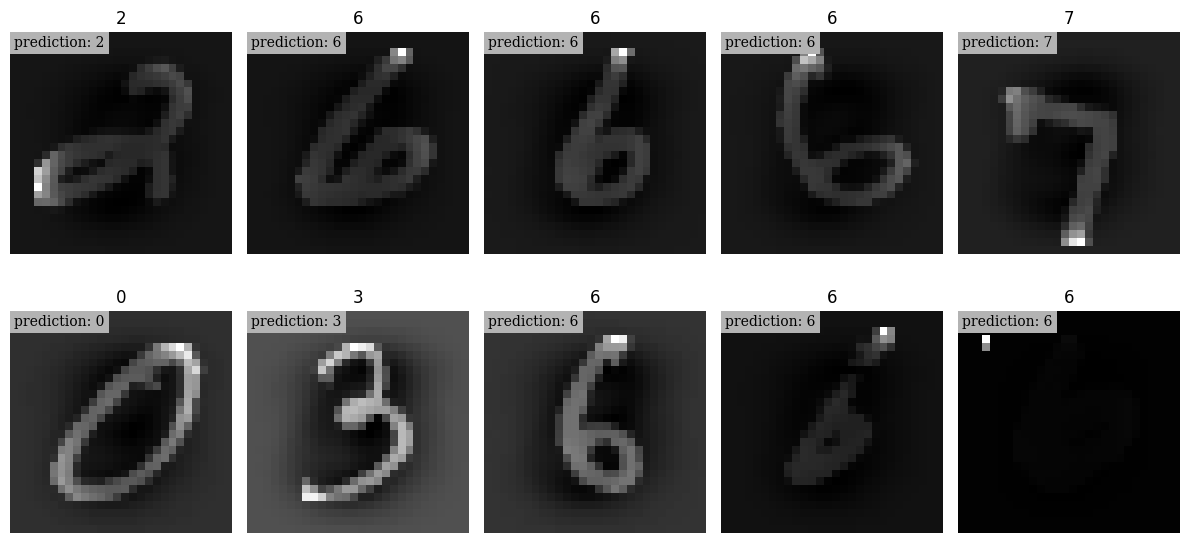

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

n_samples_to_visualize = 10
random_indices = np.random.randint(0, len(X_test), n_samples_to_visualize)

predicted_labels = svm_classifier.predict(X_test[random_indices])

plt.figure(figsize=(12, 6))
for i, idx in enumerate(random_indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.annotate(text=f"prediction: {predicted_labels[i]}", xy=(0,0), fontsize='medium', verticalalignment='top', fontfamily='serif',
        bbox=dict(facecolor='0.7', edgecolor='none', pad=3.0))
    plt.title(predicted_labels[i])
plt.tight_layout()
plt.show()
